In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Downloads\linear_regression_dataset.csv")
df

,Feature1,Feature2,Feature3,Category,Name,Target
0,54.967142,72.642384,62,A,Alice,371.099650
1,48.617357,64.446117,63,B,Charlie,299.184743
2,56.476885,61.820944,25,C,Bob,319.605931
3,65.230299,62.149045,56,C,Alice,348.440917
4,47.658466,41.569469,33,C,Bob,201.644393
...,...,...,...,...,...,...
200,54.967142,72.642384,62,A,Alice,371.099650
201,48.617357,64.446117,63,B,Charlie,299.184743
202,56.476885,61.820944,25,C,Bob,319.605931
203,65.230299,62.149045,56,C,Alice,348.440917


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Feature1  195 non-null    float64
 1   Feature2  197 non-null    float64
 2   Feature3  205 non-null    int64  
 3   Category  205 non-null    object 
 4   Name      205 non-null    object 
 5   Target    205 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 9.7+ KB


In [5]:
df.isnull().sum()

Feature1    10
Feature2     8
Feature3     0
Category     0
Name         0
Target       0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(5)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
# replace null values

for col in df.columns:
  if df[col].dtype == "int64" or df[col].dtype == "float64":
    df[col] = df[col].fillna(df[col].mean())
  else:
    df[col] = df[col].fillna(df[col].mode()[0])

In [10]:
df.isnull().sum()

Feature1    0
Feature2    0
Feature3    0
Category    0
Name        0
Target      0
dtype: int64

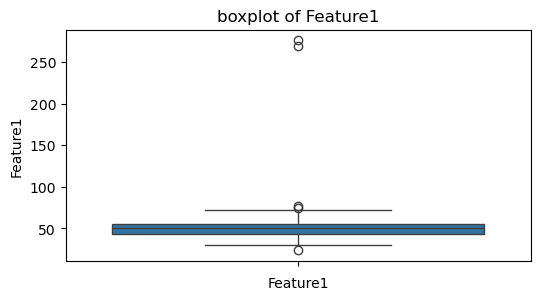

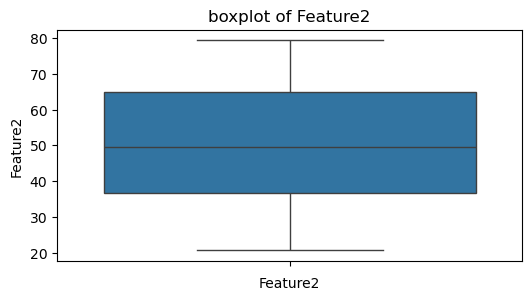

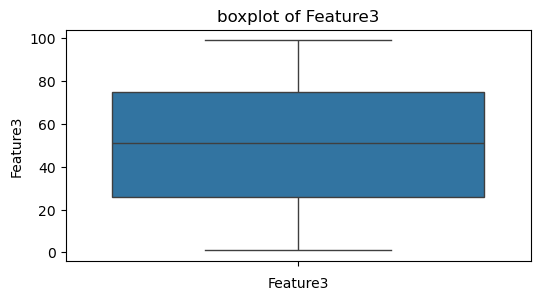

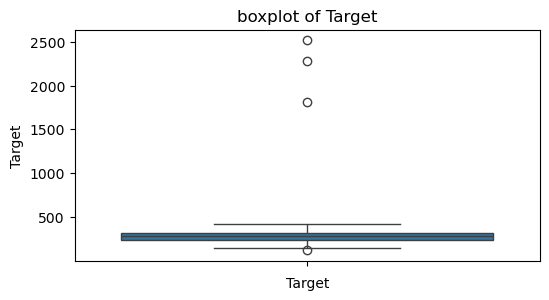

In [11]:
# check for outliers or do outliers analysis
for col in df.columns:
  if df[col].dtype == "int64" or df[col].dtype == "float64":
    plt.figure(figsize=(6,3))
    sns.boxplot(df[col])
    plt.title(f"boxplot of {col}")
    plt.xlabel(col)
    plt.show()

In [12]:
df.shape

(200, 6)

In [13]:
# to remove outliers

for col in df.columns:
  if df[col].dtype == "int64" or df[col].dtype == "float64":
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr


    # remove outliers
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [14]:
# after outliers are removed
df.shape

(191, 6)

In [15]:
# encoding
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
for col in df.columns:
  if df[col].dtype == "object":
    df[col] = LE.fit_transform(df[col])

In [16]:
df.head()

,Feature1,Feature2,Feature3,Category,Name,Target
0,54.967142,72.642384,62,0,0,371.099650
1,48.617357,64.446117,63,1,2,299.184743
2,56.476885,61.820944,25,2,1,319.605931
3,65.230299,62.149045,56,2,0,348.440917
4,47.658466,41.569469,33,2,1,201.644393


In [17]:
# model building

In [18]:
#  Splitting the data x,y
x = df.iloc[:, :-1]
y = df["Target"]